# Imports

In [1]:
# Python standard library
import sys

# Pore stats
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/rp')
import resistive_pulse as rp
import rp_file

sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi')
import optical_imaging as oi
import oi_file

# Scientific computing
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

# Cosmetic

In [2]:
sphere_red = np.array([189,63,63])/255.
b1_blue = np.array([32,65,148])/255.
b42_green = np.array([61, 183, 134])/255.

# Load data

In [3]:
base_path = '/home/prestonh/Desktop/Research/micropores/length_analysis/PET7/200mM/'
sphere_file_paths = ['sphere_400ps_0000_events.json']
b1_file_paths = ['rod_b1_0000_events.json', 'rod_b1_0001_events.json']
b42_file_paths = ['rod_b42_0000_events.json', 'rod_b42_0002_events.json', 'rod_b42_0003_events.json']



# Sphere events
sampling_rate = 20000.
sphere_events = []
sphere_files = []
for sphere_file_path in sphere_file_paths:
    rp_data = rp_file.get_data(base_path + sphere_file_path.replace('_events.json','.abf'))
    
    new_sphere_events = rp_file.open_event_file_json(base_path + sphere_file_path)   
    sphere_events += new_sphere_events
    
    new_sphere_files = [sphere_file_path]*len(new_sphere_events)
    sphere_files += new_sphere_files
        
        
        
    

# B1 events
sampling_rate = 20000.
b1_events = []
b1_files = []
for b1_file_path in b1_file_paths:
    rp_data = rp_file.get_data(base_path + b1_file_path.replace('_events.json','.abf'))
    
    new_b1_events = rp_file.open_event_file_json(base_path + b1_file_path)
    b1_events += new_b1_events
    
    new_b1_files = [b1_file_path]*len(new_b1_events)
    b1_files += new_b1_files



# B42 events
sampling_rate = 20000.
b42_events = []
b42_files = []
for b42_file_path in b42_file_paths:
    rp_data = rp_file.get_data(base_path + b42_file_path.replace('_events.json','.abf'))
    
    new_b42_events = rp_file.open_event_file_json(base_path + b42_file_path)
    b42_events += new_b42_events
    
    new_b42_files = [b42_file_path]*len(new_b42_events)
    b42_files += new_b42_files

# Select 5 events

### Sphere

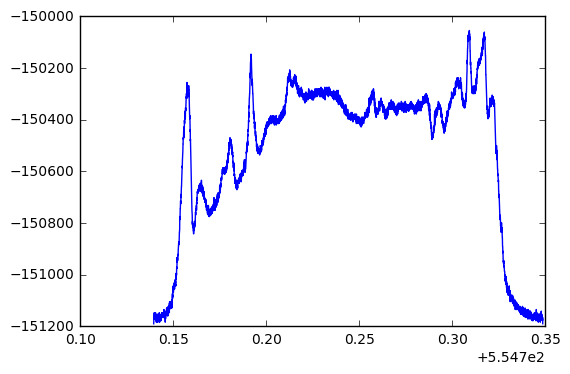

In [4]:
index = 3
plt.plot(sphere_events[index]._data[:,0], sphere_events[index]._data[:,1])
plt.show()

In [5]:
indices = [0,1,2,3,4]
sphere_events = [sphere_events[i] for i in indices]
sphere_files = [sphere_files[i] for i in indices]

### b1 rod

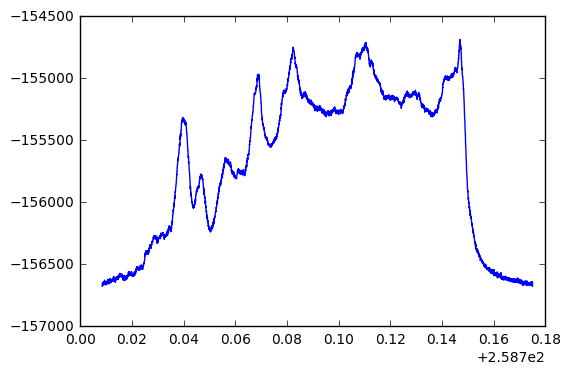

In [6]:
index = 19
plt.plot(b1_events[index]._data[:,0], b1_events[index]._data[:,1])
plt.show()

In [7]:
indices = [0,8,9,10,19]
b1_events = [b1_events[i] for i in indices]
b1_files = [b1_files[i] for i in indices]

### b42 rod

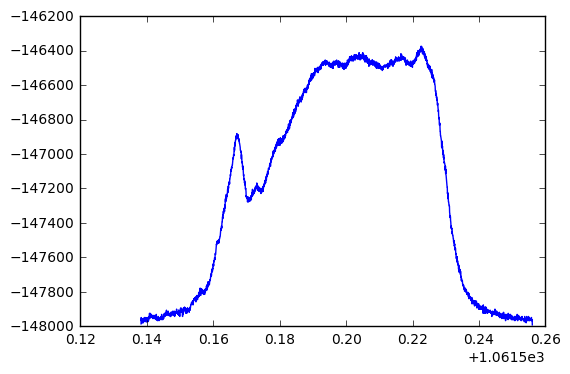

In [8]:
index = 4
plt.plot(b42_events[index]._data[:,0], b42_events[index]._data[:,1])
plt.show()

In [9]:
indices = [0,1,2,3,4]
b42_events = [b42_events[i] for i in indices]
b42_files = [b42_files[i] for i in indices]

# Get velocities

In [10]:
def filter_data(data, sigma = 50):
    filtered_data = np.copy(data)
    filtered_data[:,1] = scipy.ndimage.filters.gaussian_filter(filtered_data[:,1], sigma)
    return filtered_data

In [11]:
def get_min_indices(data):
    maxima, minima = rp.get_maxima_minima(data[:,1])
    
    
    return minima

In [12]:
filter_sigmas = [35,35,35]

### Test filter sigma and get velocities

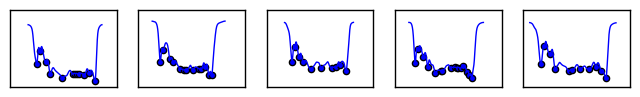

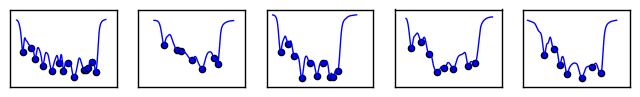

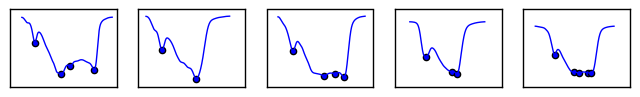

sphere [0.13605, 0.12015000000000001, 0.15135000000000001, 0.1585, 0.15145]
b1 [0.1704, 0.090499999999999997, 0.1065, 0.094700000000000006, 0.10535]
b42 [0.088900000000000007, 0.038550000000000001, 0.057250000000000002, 0.035000000000000003, 0.054800000000000001]


In [13]:
# Spheres
sphere_dts = []
sphere_minimas = []

fig,axes = plt.subplots(1,5, figsize = (8,1))
for i, event in enumerate(sphere_events):
    plt.sca(axes[i])
    filtered_data = filter_data(event._data, filter_sigmas[0])
    filtered_data[:,1] *= -1
    minima = get_min_indices(filtered_data)
    plt.plot(filtered_data[:,0], filtered_data[:,1])
    for minimum in minima:
        plt.scatter(filtered_data[minimum,0], filtered_data[minimum,1])
    
    
    sphere_dts.append((minima[-1]-minima[0])/sampling_rate)
    sphere_minimas.append([minima[0], minima[-1]])
    
    plt.xticks([])
    plt.yticks([])
    
plt.show()


# b1
b1_dts = []
b1_minimas = []

fig,axes = plt.subplots(1,5, figsize = (8,1))
for i, event in enumerate(b1_events):
    plt.sca(axes[i])
    filtered_data = filter_data(event._data, filter_sigmas[1])
    filtered_data[:,1] *= -1
    minima = get_min_indices(filtered_data)
    plt.plot(filtered_data[:,0], filtered_data[:,1])
    for minimum in minima:
        plt.scatter(filtered_data[minimum,0], filtered_data[minimum,1])
    
    
    b1_dts.append((minima[-1]-minima[0])/sampling_rate)
    b1_minimas.append([minima[0], minima[-1]])
    
    plt.xticks([])
    plt.yticks([])
    

plt.show()



# b42
b42_dts = []
b42_minimas = []

fig,axes = plt.subplots(1,5, figsize = (8,1))
for i, event in enumerate(b42_events):
    plt.sca(axes[i])
    filtered_data = filter_data(event._data, filter_sigmas[2])
    filtered_data[:,1] *= -1
    minima = get_min_indices(filtered_data)
    plt.plot(filtered_data[:,0], filtered_data[:,1])
    for minimum in minima:
        plt.scatter(filtered_data[minimum,0], filtered_data[minimum,1])
    
    
    b42_dts.append((minima[-1]-minima[0])/sampling_rate)
    b42_minimas.append([minima[0], minima[-1]])
    
    plt.xticks([])
    plt.yticks([])
    
plt.show()


print 'sphere', sphere_dts
print 'b1', b1_dts
print 'b42', b42_dts

# Extend data

In [14]:
# Sphere
print 'sphere'

extend_length = 1000

for i, sphere_event in enumerate(sphere_events):
    print '\t', i
    
    
    # Load in full data set
    sphere_file = sphere_files[i]    
    data = rp_file.get_data((base_path + sphere_file).replace('_events.json', '.abf'))

    # Get new indices
    i0 = sphere_minimas[i][0]
    i1 = sphere_minimas[i][1]
    
    j0 = int(1.*sphere_event._data[i0,0]*sampling_rate)
    j1 = int(1.*sphere_event._data[i1,0]*sampling_rate)
    
    new_j0 = j0 - extend_length
    new_j1 = j1 + extend_length
    
    sphere_event._data = np.copy(data[new_j0:new_j1+1,:])
    sphere_event._data[:,1] *= -1
    sphere_minimas[i][0] += extend_length
    sphere_minimas[i][1] += extend_length
    
    
# b1
print 'b1'

extend_length = 1000

for i, b1_event in enumerate(b1_events):
    print '\t', i
    
    # Load in full data set
    b1_file = b1_files[i]    
    data = rp_file.get_data((base_path + b1_file).replace('_events.json', '.abf'))

    # Get new indices
    i0 = b1_minimas[i][0]
    i1 = b1_minimas[i][1]
    
    j0 = int(1.*b1_event._data[i0,0]*sampling_rate)
    j1 = int(1.*b1_event._data[i1,0]*sampling_rate)
    
    new_j0 = j0 - extend_length
    new_j1 = j1 + extend_length
    
    b1_event._data = np.copy(data[new_j0:new_j1+1,:])
    b1_event._data[:,1] *= -1
    b1_minimas[i][0] += extend_length
    b1_minimas[i][1] += extend_length
    
    
# b42
print 'b42'

extend_length = 1000

for i, b42_event in enumerate(b42_events):
    print '\t', i
    
    # Load in full data set
    b42_file = b42_files[i]    
    data = rp_file.get_data((base_path + b42_file).replace('_events.json', '.abf'))

    # Get new indices
    i0 = b42_minimas[i][0]
    i1 = b42_minimas[i][1]
    
    j0 = int(1.*b42_event._data[i0,0]*sampling_rate)
    j1 = int(1.*b42_event._data[i1,0]*sampling_rate)
    
    new_j0 = j0 - extend_length
    new_j1 = j1 + extend_length
    
    b42_event._data = np.copy(data[new_j0:new_j1+1,:])
    b42_event._data[:,1] *= -1
    b42_minimas[i][0] += extend_length
    b42_minimas[i][1] += extend_length

sphere
	0
	1
	2
	3
	4
b1
	0
	1
	2
	3
	4
b42
	0
	1
	2
	3
	4


### Test extension

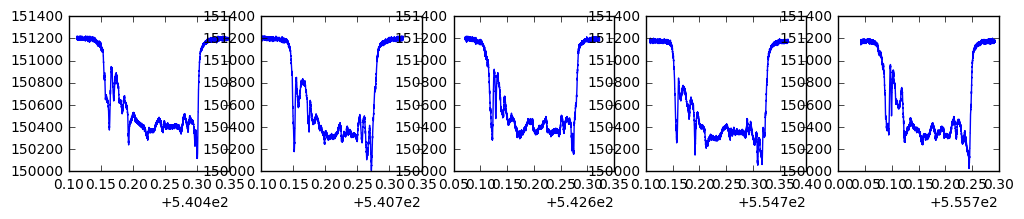

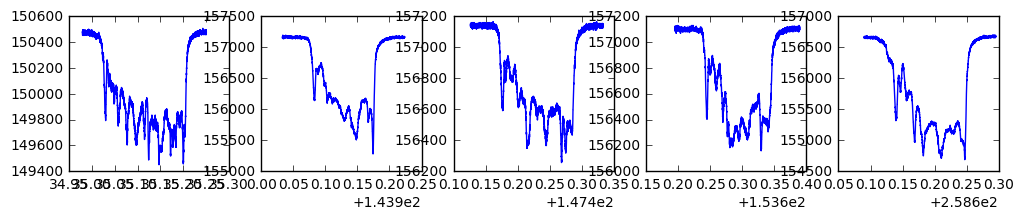

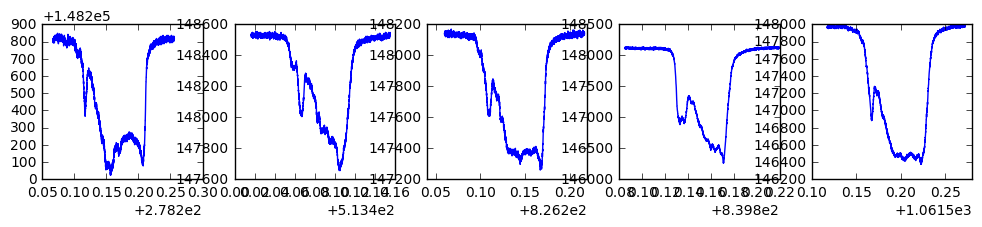

In [15]:
# Sphere
fig, axes = plt.subplots(1,5, figsize = (12,2))
for i in range(len(sphere_events)):
    fig.sca(axes[i])
    plt.plot(sphere_events[i]._data[:,0], sphere_events[i]._data[:,1])
plt.show()

# B1
fig, axes = plt.subplots(1,5, figsize = (12,2))
for i in range(len(b1_events)):
    fig.sca(axes[i])
    plt.plot(b1_events[i]._data[:,0], b1_events[i]._data[:,1])
plt.show()

# B42
fig, axes = plt.subplots(1,5, figsize = (12,2))
for i in range(len(b42_events)):
    fig.sca(axes[i])
    plt.plot(b42_events[i]._data[:,0], b42_events[i]._data[:,1])
plt.show()

sphere
0
1
2
3
4
b1
0
1
2
3
4
b42
0
1
2
3
4


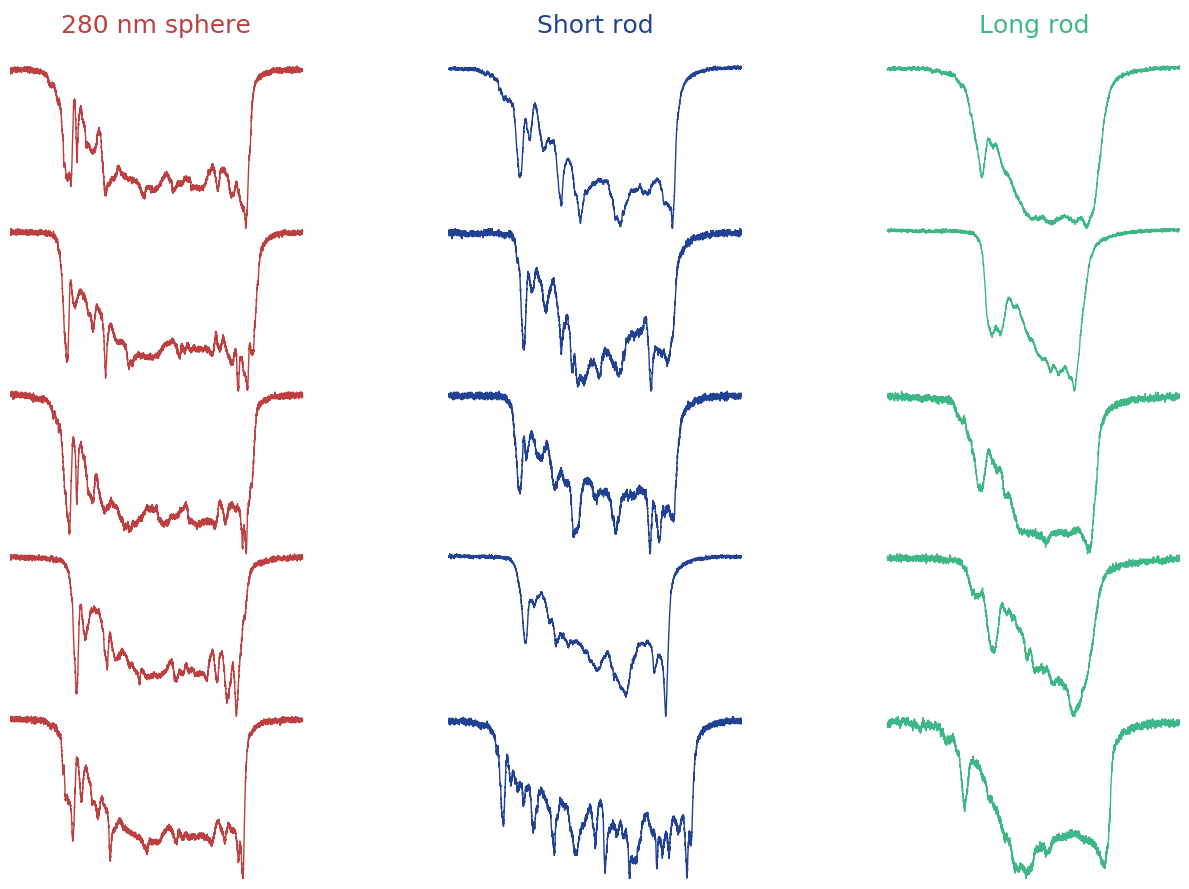

In [17]:
fig = plt.figure(figsize = (12,9))


xoffset = 1.5
yoffset = 1


print 'sphere'
for i in range(5):
    print i
    event = sphere_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    
    
    
    
    plt.plot(data[:,0], data[:,1] + i*yoffset, color = sphere_red)

    
print 'b1'
for i in range(5):
    print i

    event = b1_events[i]
    data = np.copy(event._data)
    
    
    data[:,0] = data[:,0] - data[0,0]
    
    data[:,0] = data[:,0]/np.max(data[:,0])

    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])    
    
    plt.plot(data[:,0]+xoffset, data[:,1] + i*yoffset, color = b1_blue)

    
    
    
print 'b42'
for i in range(5):
    print i
    event = b42_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    

    
    plt.plot(data[:,0]+2*xoffset, data[:,1] + i*yoffset, color = b42_green)
    
    
    
# Text
plt.text(0.5, 5.25, r'280 nm sphere', size = 18, color = sphere_red, ha = 'center', va = 'center')

plt.text(2, 5.25, r'Short rod', size = 18, color = b1_blue, ha = 'center', va = 'center')

plt.text(3.5, 5.25, r'Long rod', size = 18, color = b42_green, ha = 'center', va = 'center')


# Cosmetics
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])
    
plt.ylim(0, 5.35)
    
fig.tight_layout()
    
    
    
plt.savefig('PET7_raw.png', dpi = 300)
    
plt.show()

# Moving average

sphere
0
1
2
3
4
b1
0
[1288, 4696]
1
[1332, 3142]
2
[1295, 3425]
3
[1164, 3058]
4
[1630, 3737]
b42
0
1
2
3
4


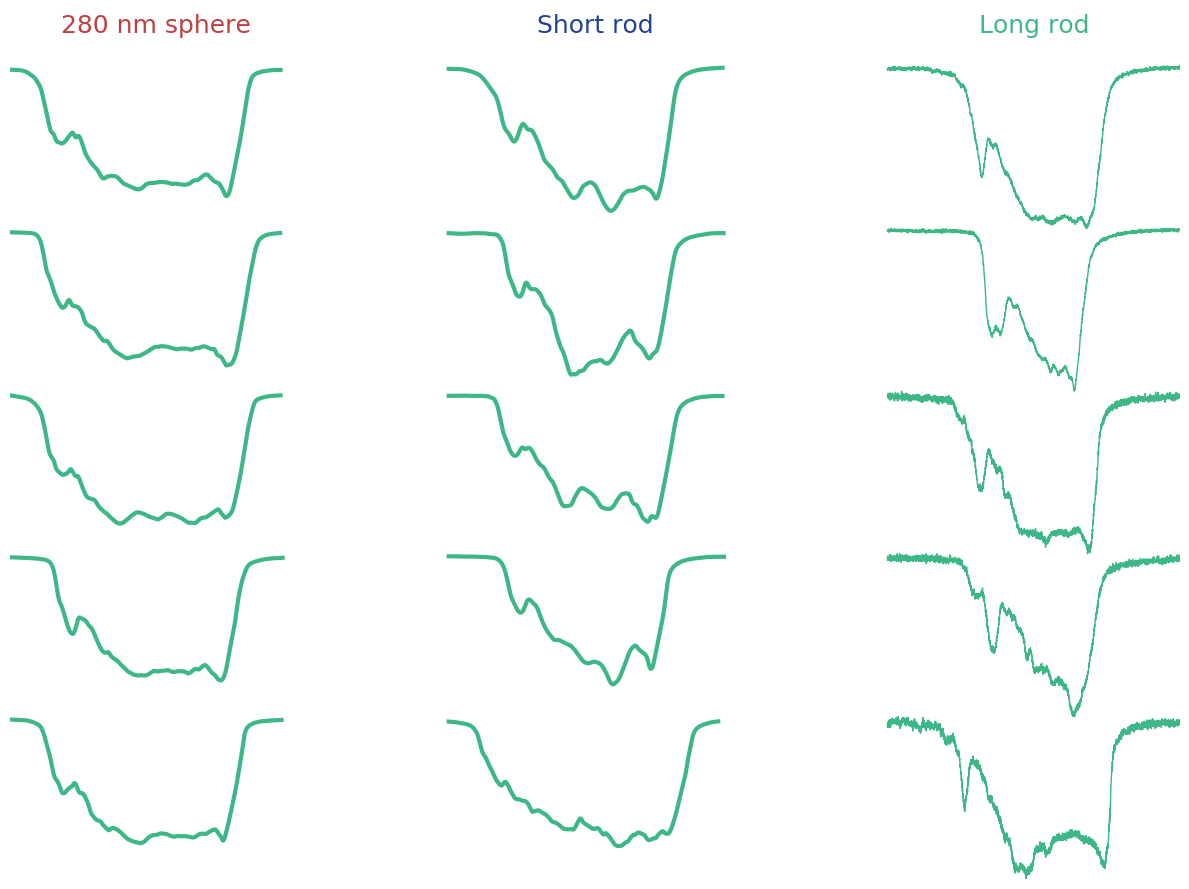

In [20]:
fig = plt.figure(figsize = (12,9))


xoffset = 1.5
yoffset = 1
minor_offset = -.5


print 'sphere'
for i in range(5):
    print i
    event = sphere_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    
    # Moving average
    cumsum_vec = np.cumsum(np.insert(data[:,1], 0, 0))
    window_width = int((sphere_minimas[i][1]-sphere_minimas[i][0])/8.)
    averaged_data = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    
    
    #plt.plot(data[:,0], data[:,1] + i*yoffset, color = sphere_red)
    plt.plot(data[:averaged_data.shape[0],0], averaged_data + i*yoffset, color = b42_green, lw = 3)

    
print 'b1'
for i in range(5):
    print i

    event = b1_events[i]
    data = np.copy(event._data)
    
    
    data[:,0] = data[:,0] - data[0,0]
    
    data[:,0] = data[:,0]/np.max(data[:,0])

    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])    
    
    # Moving average
    cumsum_vec = np.cumsum(np.insert(data[:,1], 0, 0))
    window_width = int((b1_minimas[i][1]-b1_minimas[i][0])/8.)
    print b1_minimas[i]
    averaged_data = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    
    #plt.plot(data[:,0] + 1*xoffset, data[:,1] + i*yoffset, color = b1_blue)
    plt.plot(data[:averaged_data.shape[0],0]+1*xoffset, averaged_data + i*yoffset, color = b42_green, lw = 3)

    
    
    
print 'b42'
for i in range(5):
    print i
    event = b42_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    

    
    plt.plot(data[:,0]+2*xoffset, data[:,1] + i*yoffset, color = b42_green)
    
    
    
# Text
plt.text(0.5, 5.25, r'280 nm sphere', size = 18, color = sphere_red, ha = 'center', va = 'center')

plt.text(2, 5.25, r'Short rod', size = 18, color = b1_blue, ha = 'center', va = 'center')

plt.text(3.5, 5.25, r'Long rod', size = 18, color = b42_green, ha = 'center', va = 'center')


# Cosmetics
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])
    
plt.ylim(0, 5.35)
    
fig.tight_layout()
    
    
    
#plt.savefig('PET7_averaged.png', dpi = 300)
    
plt.show()